In [1]:
import torch
import torchvision
import torchvision.datasets as datasets
import torch.nn as nn
import torch.optim as optim
torch.random.seed = 42

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Load the MNIST dataset

In [2]:
mnist_trainset = datasets.MNIST(root='../data', train=True, download=True,
                                transform=None)

mnist_testset = datasets.MNIST(root='../data', train=False, download=True,
                               transform=None)

In [3]:
print(mnist_trainset)
print('')
print(mnist_testset)

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ../data
    Transforms (if any): None
    Target Transforms (if any): None

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ../data
    Transforms (if any): None
    Target Transforms (if any): None


In [4]:
mnist_trainset.data[0].size()

torch.Size([28, 28])

In [5]:
size_len = mnist_trainset.data[0].size()[0]

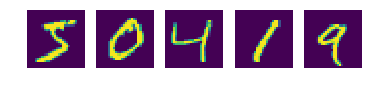

In [6]:
fig = plt.figure(1)
for i, img in enumerate(mnist_trainset.data[0:5]):
    ax = fig.add_subplot(1,5,i+1)
    ax.set_axis_off()
    ax = plt.imshow(img)
plt.show()

## Net architecture and train/test routines

In [7]:
class Net(nn.Module):
    """MLP with 3 ReLU hidden layers and 1 softmax output layer"""
    
    def __init__(self, H, C):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(size_len*size_len, H)
        self.fc2 = nn.Linear(H, H)
        self.fc3 = nn.Linear(H, H)
        self.fc4 = nn.Linear(H, C)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        x = x.view(-1, size_len*size_len)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.softmax(self.fc4(x))
        return x

In [8]:
def train(model, x_train, y_train, optimizer, criterion, epoch, disp=''):
    model.train()
    
    optimizer.zero_grad()
    output = model(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    
    if disp=='print':
        print("Train Epoch: {}\tLoss: {:.6f}".format(epoch, loss.item()))
    elif disp=='graph':
        pass
    
    return loss
        

In [9]:
def test(model, x_test, y_test, criterion, disp=''):
    model.eval()

    with torch.no_grad():
        output = model(x_test)
        test_loss = criterion(output, y_test)

    if disp=='print':
        print("\nTest set: Average loss: {:.4f}\n".format(test_loss))
    elif disp=='graph':
        pass
        
    return test_loss


## Training

In [10]:
X_train = mnist_trainset.data.float()
y_train = mnist_trainset.targets

X_test = mnist_testset.data.float()
y_test = mnist_testset.targets

In [11]:
model = Net(100, 10)
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): LogSoftmax()
)


In [12]:
alpha = 0.01
gamma = 10
max_epoch = 100
optimizer = optim.SGD(model.parameters(), lr=alpha)
criterion = torch.nn.NLLLoss()

In [13]:
epoch = count = 0

In [14]:
for epoch in range(300):
    train(model, X_train, y_train, optimizer, criterion, epoch, 'print')
#    test(model, X_test, y_test, criterion, 'print')

Train Epoch: 0	Loss: 5.761347
Train Epoch: 1	Loss: 6.645049
Train Epoch: 2	Loss: 6.426782
Train Epoch: 3	Loss: 4.026203
Train Epoch: 4	Loss: 2.825845
Train Epoch: 5	Loss: 2.278574
Train Epoch: 6	Loss: 2.052420
Train Epoch: 7	Loss: 1.910081
Train Epoch: 8	Loss: 1.764348
Train Epoch: 9	Loss: 1.611848
Train Epoch: 10	Loss: 1.460411
Train Epoch: 11	Loss: 1.321166
Train Epoch: 12	Loss: 1.198248
Train Epoch: 13	Loss: 1.095159
Train Epoch: 14	Loss: 1.019107
Train Epoch: 15	Loss: 1.003167
Train Epoch: 16	Loss: 1.137683
Train Epoch: 17	Loss: 1.560563
Train Epoch: 18	Loss: 1.233567
Train Epoch: 19	Loss: 0.946835
Train Epoch: 20	Loss: 0.825545
Train Epoch: 21	Loss: 0.757117
Train Epoch: 22	Loss: 0.733004
Train Epoch: 23	Loss: 0.743758
Train Epoch: 24	Loss: 0.892473
Train Epoch: 25	Loss: 1.470630
Train Epoch: 26	Loss: 1.518587
Train Epoch: 27	Loss: 1.058077
Train Epoch: 28	Loss: 0.699672
Train Epoch: 29	Loss: 0.622593
Train Epoch: 30	Loss: 0.585923
Train Epoch: 31	Loss: 0.560734
Train Epoch: 32	Lo

Train Epoch: 260	Loss: 0.180877
Train Epoch: 261	Loss: 0.180534
Train Epoch: 262	Loss: 0.180194
Train Epoch: 263	Loss: 0.179855
Train Epoch: 264	Loss: 0.179518
Train Epoch: 265	Loss: 0.179183
Train Epoch: 266	Loss: 0.178850
Train Epoch: 267	Loss: 0.178519
Train Epoch: 268	Loss: 0.178188
Train Epoch: 269	Loss: 0.177860
Train Epoch: 270	Loss: 0.177530
Train Epoch: 271	Loss: 0.177205
Train Epoch: 272	Loss: 0.176881
Train Epoch: 273	Loss: 0.176558
Train Epoch: 274	Loss: 0.176237
Train Epoch: 275	Loss: 0.175916
Train Epoch: 276	Loss: 0.175601
Train Epoch: 277	Loss: 0.175283
Train Epoch: 278	Loss: 0.174971
Train Epoch: 279	Loss: 0.174657
Train Epoch: 280	Loss: 0.174348
Train Epoch: 281	Loss: 0.174036
Train Epoch: 282	Loss: 0.173733
Train Epoch: 283	Loss: 0.173424
Train Epoch: 284	Loss: 0.173122
Train Epoch: 285	Loss: 0.172819
Train Epoch: 286	Loss: 0.172519
Train Epoch: 287	Loss: 0.172220
Train Epoch: 288	Loss: 0.171921
Train Epoch: 289	Loss: 0.171624
Train Epoch: 290	Loss: 0.171330
Train Ep

In [15]:
test(model, X_test, y_test, criterion, 'print')


Test set: Average loss: 0.1753



tensor(0.1753)

In [16]:
model = Net(300, 10)
optimizer = optim.SGD(model.parameters(), lr=0.01)
min_error = 999
epoch = count = 0
train_loss_vec = []
test_loss_vec = []

while (epoch < 100 and count < 30):
    train_loss = train(model, X_train, y_train, optimizer, criterion, epoch, '')
    test_loss = test(model, X_test, y_test, criterion)
    train_loss_vec.append(train_loss)
    test_loss_vec.append(test_loss)
    epoch += 1
    if test_loss >= min_error:
        count += 1
    else:
        min_error = test_loss
        
test(model, X_test, y_test, criterion, 'print')


Test set: Average loss: 0.2200



tensor(0.2200)

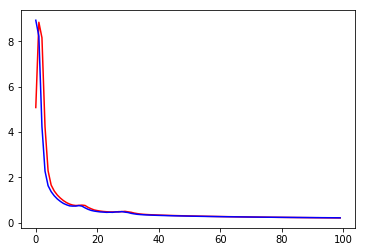

In [17]:
plt.plot(train_loss_vec, "r")
plt.hold = True
plt.plot(test_loss_vec, "b")
plt.hold = False
plt.show()